![alt text](task_2.png "Task 1")

In [11]:
import sympy as sp
from sympy.physics.vector import init_vprinting, dynamicsymbols, ReferenceFrame, Point
import numpy as np

omega_1, eps_1, MM_o, OM_o = sp.symbols('omega_1, eps_1, MM_o, OM_o')
t, beta, alfa = dynamicsymbols('t theta alfa')

# initialize constants from the task:
OM_o_v = 40
omega_1_v = 2
eps_1_v = 3.7
MM_o_v = 5
alfa_v = 30
beta_v = 120
phi_v = omega_1 * t

In [12]:

init_vprinting(pretty_print=False)

phi = omega_1 * t + eps_1 * t ** 2
xyz = ReferenceFrame('O')
x_1_y_1z = ReferenceFrame('O_1')
omega_eta_zeta = ReferenceFrame('O_2')
eps_eta_zeta_1 = ReferenceFrame('O_3')

x_1_y_1z.orient(xyz, 'Axis', [phi, xyz.z])
omega_eta_zeta.orient(x_1_y_1z, 'Axis', [beta / 2, x_1_y_1z.y])
eps_eta_zeta_1.orient(omega_eta_zeta, 'Axis', [alfa / 2, omega_eta_zeta.y])

o = Point('o')
centre_A = Point('C')
centre_A.set_pos(o, OM_o * sp.cos(alfa / 2) * eps_eta_zeta_1.x)

M_o = Point('M_o')
M_o.set_pos(centre_A, OM_o * sp.sin(alfa / 2) * eps_eta_zeta_1.z)
M_o.pos_from(o)

rot_O_to_O1 = x_1_y_1z.dcm(xyz)
rot_O1_to_O2 = omega_eta_zeta.dcm(x_1_y_1z)
rot_O2_to_O3 = eps_eta_zeta_1.dcm(omega_eta_zeta)
print(rot_O_to_O1)










Matrix([[cos(eps_1*t(t)**2 + omega_1*t(t)), sin(eps_1*t(t)**2 + omega_1*t(t)), 0], [-sin(eps_1*t(t)**2 + omega_1*t(t)), cos(eps_1*t(t)**2 + omega_1*t(t)), 0], [0, 0, 1]])


In [13]:
r_A = OM_o * sp.sin(alfa / 2)
# c_x = r_A * np.cos(theta / 2) + OM_o * sp.cos(theta / 2)
# c_y = 0
# c_z = OM_o * sp.sin(theta / 2) - r_A * sp.sin(theta / 2)




In [14]:
c_zeta = OM_o * sp.cos(alfa / 2)
c_y = 0
c_eta = 0

c_coord_in_O3 = np.array([[c_zeta], [c_y], [c_eta]])
c_coord_in_O2 = rot_O2_to_O3 * c_coord_in_O3
c_coord_in_O1 = rot_O1_to_O2 * c_coord_in_O2
c_coord_in_O = rot_O_to_O1 * c_coord_in_O1
print(c_coord_in_O)

m_o_zeta = OM_o * sp.cos(alfa / 2)
m_o_eta = OM_o * sp.sin(alfa / 2)
m_o_y = 0

m_o_coord_in_O3 = np.array([[m_o_zeta], [m_o_y], [m_o_eta]])
m_o_coord_in_O2 = rot_O2_to_O3 * m_o_coord_in_O3
m_o_coord_in_O1 = rot_O1_to_O2 * m_o_coord_in_O2
m_o_coord_in_O = rot_O_to_O1 * m_o_coord_in_O1


Matrix([[(-OM_o*sin(alfa(t)/2)*sin(theta(t)/2)*cos(alfa(t)/2) + OM_o*cos(alfa(t)/2)**2*cos(theta(t)/2))*cos(eps_1*t(t)**2 + omega_1*t(t))], [-(-OM_o*sin(alfa(t)/2)*sin(theta(t)/2)*cos(alfa(t)/2) + OM_o*cos(alfa(t)/2)**2*cos(theta(t)/2))*sin(eps_1*t(t)**2 + omega_1*t(t))], [OM_o*sin(alfa(t)/2)*cos(alfa(t)/2)*cos(theta(t)/2) + OM_o*sin(theta(t)/2)*cos(alfa(t)/2)**2]])


In [18]:
from typing import List, Tuple

## translation a point from sympy format into array
duration = 5
dt = 0.004
t_linspace = np.linspace(0, duration, int(duration / dt), endpoint=True)


def translate_point(point_sp_expr, optional_data: List[Tuple[sp.Symbol, np.ndarray]] = None,
                    optional_values: List[Tuple[sp.Symbol, float]] = None):
    i = 0
    point_data = np.empty(shape=(t_linspace.size, 3), dtype=float)
    for current_t in t_linspace:
        opt = [(k, v[i]) for k, v in optional_data] if optional_data is not None else []
        vals = [(k, v) for k, v in optional_values] if optional_values is not None else []

        x = point_sp_expr[0].subs([(t, current_t)] + opt + vals)
        y = point_sp_expr[1].subs([(t, current_t)] + opt + vals)
        z = point_sp_expr[2].subs([(t, current_t)] + opt + vals)
        try:
            x = float(x)
            y = float(y)
            z = float(z)
        except TypeError:
            x = 0
            y = 0
            z = 0
        point_data[i] = [x, y, z]
        i = i + 1
    return point_data


c_point_data = translate_point(c_coord_in_O, optional_values=[
    (MM_o, MM_o_v), (omega_1, omega_1_v), (eps_1, eps_1_v), (OM_o, OM_o_v), (alfa, alfa_v), (beta, beta_v),
    (phi, phi_v)])
m_o_point_data = translate_point(c_coord_in_O, optional_values=[
    (MM_o, MM_o_v), (omega_1, omega_1_v), (eps_1, eps_1_v), (OM_o, OM_o_v), (alfa, alfa_v), (beta, beta_v),
    (phi, phi_v)])
print(m_o_point_data)

x: 40*cos(15)**2*cos(60) - 40*sin(15)*sin(60)*cos(15) 
y: 0 
z: 40*sin(60)*cos(15)**2 + 40*sin(15)*cos(15)*cos(60) 

x: 39.9986988967375*cos(15)**2*cos(60) - 39.9986988967375*sin(15)*sin(60)*cos(15) 
y: 0.322624500204957*sin(15)*sin(60)*cos(15) - 0.322624500204957*cos(15)**2*cos(60) 
z: 40*sin(60)*cos(15)**2 + 40*sin(15)*cos(15)*cos(60) 

x: 39.9947188729845*cos(15)**2*cos(60) - 39.9947188729845*sin(15)*sin(60)*cos(15) 
y: 0.649970976995475*sin(15)*sin(60)*cos(15) - 0.649970976995475*cos(15)**2*cos(60) 
z: 40*sin(60)*cos(15)**2 + 40*sin(15)*cos(15)*cos(60) 

x: 39.9879437382868*cos(15)**2*cos(60) - 39.9879437382868*sin(15)*sin(60)*cos(15) 
y: 0.98201608113415*sin(15)*sin(60)*cos(15) - 0.98201608113415*cos(15)**2*cos(60) 
z: 40*sin(60)*cos(15)**2 + 40*sin(15)*cos(15)*cos(60) 

x: 39.9782558312069*cos(15)**2*cos(60) - 39.9782558312069*sin(15)*sin(60)*cos(15) 
y: 1.31873450496005*sin(15)*sin(60)*cos(15) - 1.31873450496005*cos(15)**2*cos(60) 
z: 40*sin(60)*cos(15)**2 + 40*sin(15)*cos(15)*c

In [19]:
def draw_point(point, point_data):
    """ using matplotlib sets a point data to point note in the format np.array[,] """

    point.set_data([point_data[0]], [point_data[1]])
    point.set_3d_properties([point_data[2]])
    # Axes3D.plot(point_data[0], point_data[1], point_data[2], zdir='z')


def draw_line(line, point_start, point_end):
    """ using matplotlib sets point coordinates data to line, to set data use format np.array[,] """

    line.set_data([point_end[0], point_start[0]],
                  [point_end[1], point_start[1]])
    line.set_3d_properties([point_end[2], point_start[2]])


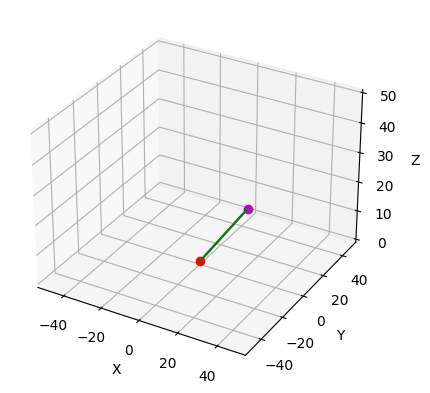

In [22]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

# % matplotlib notebook

from matplotlib.animation import FuncAnimation

fig = plt.figure()
ax = plt.axes(projection='3d')
xdata, ydata, zdata = [], [], []

# Setting the axes properties
ax.set(xlim3d=(-np.sin(np.pi / 3) * 40 * 1.5, np.sin(np.pi / 3) * 40 * 1.5), xlabel='X')
ax.set(ylim3d=(-np.sin(np.pi / 3) * 40 * 1.5, np.sin(np.pi / 3) * 40 * 1.5), ylabel='Y')
ax.set(zlim3d=(0, 50), zlabel='Z')

O_plot, = ax.plot3D([0], [0], [0], 'ro')
c_plot, = ax.plot3D([0], [0], [0], 'mo')
co_plot, = ax.plot3D([0], [0], [0], 'm')
c_m_o_plot, = ax.plot3D([0], [0], [0], 'g')
m_o_o_plot, = ax.plot3D([0], [0], [0], 'g')


def init():
    draw_point(O_plot, [0, 0, 0])
    return O_plot, c_plot, co_plot, c_m_o_plot, m_o_o_plot,


def update(frame):
    draw_point(c_plot, c_point_data[frame])
    draw_line(co_plot, c_point_data[frame], [0, 0, 0])
    draw_line(c_m_o_plot, c_point_data[frame], m_o_point_data[frame])
    draw_line(m_o_o_plot, m_o_point_data[frame], [0, 0, 0])
    return c_plot, co_plot, c_m_o_plot, m_o_o_plot,


# X = np.arange(-np.sin(np.pi / 3) * 40, np.sin(np.pi / 3) * 40, 0.25)
# Y = np.arange(-np.sin(np.pi / 3) * 40, np.sin(np.pi / 3) * 40, 0.25)
# X, Y = np.meshgrid(X, Y, sparse=True)
# R = np.sqrt((X ** 2 + Y ** 2) / np.tan(np.pi / 3) ** 2)
# Z = R
# surf = ax.plot_surface(X, Y, Z)
# ani = FuncAnimation(fig, update, frames=np.arange(0, t_linspace.size, 1),
#                     init_func=init, interval=16, blit=False)

ani = FuncAnimation(fig, update, frames=t_linspace.size,
                    init_func=init, interval=int(dt * 1000), blit=False)
# plt.show()
ani.save('3d_anim.mp4')

In [29]:
from spatialmath.base import plot_sphere

plot_sphere(radius=1, color='r')

ModuleNotFoundError: No module named 'spatialmath'

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import time


def generate(X, Y, phi):
    """
    Generates Z data for the points in the X, Y meshgrid and parameter phi.
    """
    R = 1 - np.sqrt(X ** 2 + Y ** 2)
    return np.cos(2 * np.pi * X + phi) * R


fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Make the X, Y meshgrid.
xs = np.linspace(-1, 1, 50)
ys = np.linspace(-1, 1, 50)
X, Y = np.meshgrid(xs, ys)

# Set the z axis limits so they aren't recalculated each frame.
ax.set_zlim(-1, 1)

# Begin plotting.
wframe = None
tstart = time.time()
for phi in np.linspace(0, 180. / np.pi, 100):
    # If a line collection is already remove it before drawing.
    if wframe:
        wframe.remove()

    # Plot the new wireframe and pause briefly before continuing.
    Z = generate(X, Y, phi)
    wframe = ax.plot_wireframe(X, Y, Z, rstride=2, cstride=2)
    plt.pause(.001)

print('Average FPS: %f' % (100 / (time.time() - tstart)))

In [ ]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# load some test data for demonstration and plot a wireframe
X, Y, Z = axes3d.get_test_data(0.1)
ax.plot_wireframe(X, Y, Z, rstride=5, cstride=5)

# rotate the axes and update
for angle in range(0, 360):
    ax.view_init(30, angle)
    plt.draw()
    plt.pause(.001)